In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [182]:
# 데이터 불러오기

corona_seoul = pd.read_csv("서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding="euc-kr", thousands=",")
corona_seoul.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.03.30.00,37261,1045,33753,919,55376,1504,81018,1990,96008,...,104368,3839,136200,3872,176765,4479,121926,3084,164008,4988
1,2022.03.29.00,36216,940,32835,957,53872,1481,79030,2233,93474,...,100529,1660,132333,3524,172292,4913,118842,2996,159020,3230
2,2022.03.28.00,35276,397,31878,301,52391,739,76802,694,91030,...,98869,1996,128813,2517,167386,2013,115846,2297,155792,1630
3,2022.03.27.00,34879,818,31577,674,51652,932,76108,1930,89876,...,96873,1749,126296,2304,165373,3723,113549,2900,154162,3116
4,2022.03.26.00,34061,854,30903,793,50720,1234,74178,1685,87770,...,95124,2467,123992,3862,161650,4013,110649,3133,151046,4050


In [183]:
corona_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구 기준일  786 non-null    object
 1   종로구 전체   786 non-null    int64 
 2   종로구 추가   786 non-null    int64 
 3   중구 전체    786 non-null    int64 
 4   중구 추가    786 non-null    int64 
 5   용산구 전체   786 non-null    int64 
 6   용산구 추가   786 non-null    int64 
 7   성동구 전체   786 non-null    int64 
 8   성동구 추가   786 non-null    int64 
 9   광진구 전체   786 non-null    int64 
 10  광진구 추가   786 non-null    int64 
 11  동대문구 전체  786 non-null    int64 
 12  동대문구 추가  786 non-null    int64 
 13  중랑구 전체   786 non-null    int64 
 14  중랑구 추가   786 non-null    int64 
 15  성북구 전체   786 non-null    int64 
 16  성북구 추가   786 non-null    int64 
 17  강북구 전체   786 non-null    int64 
 18  강북구 추가   786 non-null    int64 
 19  도봉구 전체   786 non-null    int64 
 20  도봉구 추가   786 non-null    int64 
 21  노원구 전체   786 non-null    int64 
 22  노원

In [184]:
# 일별 확진자 수만 불러오기

corona_gu = corona_seoul[['자치구 기준일','종로구 추가', '중구 추가', '용산구 추가', '성동구 추가', '광진구 추가',
             '동대문구 추가', '중랑구 추가', '성북구 추가', '강북구 추가', '도봉구 추가', '노원구 추가',
             '은평구 추가', '서대문구 추가', '마포구 추가', '양천구 추가', '강서구 추가', '구로구 추가', 
             '금천구 추가', '영등포구 추가', '동작구 추가', '관악구 추가', '서추구 추가', '강남구 추가',
             '송파구 추가', '강동구 추가', '기타 추가']]
corona_gu.head()

,자치구 기준일,종로구 추가,중구 추가,용산구 추가,성동구 추가,광진구 추가,동대문구 추가,중랑구 추가,성북구 추가,강북구 추가,...,구로구 추가,금천구 추가,영등포구 추가,동작구 추가,관악구 추가,서추구 추가,강남구 추가,송파구 추가,강동구 추가,기타 추가
0,2022.03.30.00,1045,919,1504,1990,2534,2442,3033,3253,2184,...,3812,1847,4122,3283,4679,3839,3872,4479,3084,4988
1,2022.03.29.00,940,957,1481,2233,2444,2718,2837,3028,2180,...,2595,1894,2072,2290,2821,1660,3524,4913,2996,3230
2,2022.03.28.00,397,301,739,694,1154,975,1060,1083,751,...,963,553,1193,1239,1431,1996,2517,2013,2297,1630
3,2022.03.27.00,818,674,932,1930,2106,1957,2669,3063,1674,...,2672,1468,2567,2437,2961,1749,2304,3723,2900,3116
4,2022.03.26.00,854,793,1234,1685,2210,2039,2447,2516,1724,...,2642,1554,2693,2398,3222,2467,3862,4013,3133,4050


In [185]:
# 칼럼명 수정

corona_gu.rename(columns={#'자치구 기준일' : '확진일',
                            '종로구 추가':'종로구',
                            '중구 추가':'중구',
                            '용산구 추가':'용산구',
                            '성동구 추가':'성동구',
                            '광진구 추가':'광진구',
                            '동대문구 추가':'동대문구',
                            '중랑구 추가':'중랑구',
                            '성북구 추가':'성북구',
                            '강북구 추가':'강북구',
                            '도봉구 추가':'도봉구',
                            '노원구 추가':'노원구',
                            '은평구 추가':'은평구',
                            '서대문구 추가':'서대문구',
                            '마포구 추가':'마포구',
                            '양천구 추가':'양천구',
                            '강서구 추가':'강서구',
                            '구로구 추가':'구로구',
                            '금천구 추가':'금천구',
                            '영등포구 추가':'영등포구',
                            '동작구 추가':'동작구',
                            '관악구 추가':'관악구',
                            '서추구 추가':'서초구',
                            '강남구 추가':'강남구',
                            '송파구 추가':'송파구',
                            '강동구 추가':'강동구',
                            '기타 추가':'기타'}, inplace=True)
corona_gu.head()

C:\Users\ch002\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2022.03.30.00,1045,919,1504,1990,2534,2442,3033,3253,2184,...,3812,1847,4122,3283,4679,3839,3872,4479,3084,4988
1,2022.03.29.00,940,957,1481,2233,2444,2718,2837,3028,2180,...,2595,1894,2072,2290,2821,1660,3524,4913,2996,3230
2,2022.03.28.00,397,301,739,694,1154,975,1060,1083,751,...,963,553,1193,1239,1431,1996,2517,2013,2297,1630
3,2022.03.27.00,818,674,932,1930,2106,1957,2669,3063,1674,...,2672,1468,2567,2437,2961,1749,2304,3723,2900,3116
4,2022.03.26.00,854,793,1234,1685,2210,2039,2447,2516,1724,...,2642,1554,2693,2398,3222,2467,3862,4013,3133,4050


In [186]:
# 2021년 데이터만 가져오기
corona_2021 = corona_gu[89:455]
corona_2021

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
89,2021.12.31.00,24,22,38,43,61,72,68,71,58,...,62,40,78,52,70,52,86,109,106,100
90,2021.12.30.00,28,23,33,53,62,63,64,86,77,...,83,40,76,64,77,69,84,120,92,113
91,2021.12.29.00,43,33,36,42,49,98,69,82,66,...,86,54,87,73,77,71,67,86,91,180
92,2021.12.28.00,40,23,29,39,51,61,39,107,44,...,45,25,42,41,51,33,67,82,57,77
93,2021.12.27.00,30,29,31,26,43,61,71,111,59,...,30,37,42,50,77,56,69,116,57,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12
451,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
452,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
453,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24


In [187]:
# 데이터 역순으로
corona_2021=corona_2021[::-1]
corona_2021.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
454,2021.01.01.00,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
453,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
452,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
451,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
450,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12


In [188]:
#인덱스 다시 설정
corona_2021=corona_2021.reset_index(drop=True)
corona_2021

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021.01.01.00,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
1,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
2,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
3,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
4,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021.12.27.00,30,29,31,26,43,61,71,111,59,...,30,37,42,50,77,56,69,116,57,78
362,2021.12.28.00,40,23,29,39,51,61,39,107,44,...,45,25,42,41,51,33,67,82,57,77
363,2021.12.29.00,43,33,36,42,49,98,69,82,66,...,86,54,87,73,77,71,67,86,91,180
364,2021.12.30.00,28,23,33,53,62,63,64,86,77,...,83,40,76,64,77,69,84,120,92,113


In [189]:
# 날짜 수정(뒤에 쓸모없는 00 빼기)

day = []

for data in corona_2021['자치구 기준일']:
    day.append(data[0:10])
    
day
corona_2021['자치구 기준일']=day
corona_2021.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021.01.01,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
1,2021.01.02,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
2,2021.01.03,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
3,2021.01.04,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
4,2021.01.05,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12


In [190]:
#corona_2021.info()

corona_2021['자치구 기준일'] = pd.to_datetime(corona_2021['자치구 기준일'], format="%Y.%m.%d")
corona_2021.rename(columns={'자치구 기준일':'확진일'}, inplace=True)
corona_2021.head()

,확진일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021-01-01,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
1,2021-01-02,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
2,2021-01-03,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
3,2021-01-04,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
4,2021-01-05,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12


### 월 별 확진자

In [199]:
# 월별로 묶기

corona_2021['월'] = pd.DatetimeIndex(corona_2021['확진일']).month
corona_2021.head()

month_2021 = corona_2021.groupby("월").sum()
month_2021['강서구']

월
1      216
2       99
3      125
4      218
5      199
6      210
7      565
8      645
9      889
10     719
11    1730
12    3480
Name: 강서구, dtype: int64

#### 1. 서울 월별 확진자 총합

In [200]:
# 서울 2021년 월별 확진자 수 구하기

# 월별 총 합
month_2021['합']=month_2021.sum(axis=1)
month_2021.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합
월,,,,,,,,,,,,,,,,,,,,,
1,122,74,106,141,125,222,219,211,186,182,...,74,194,215,171,142,225,252,183,727,5133
2,42,88,235,119,153,178,167,208,123,140,...,71,172,150,186,111,124,210,158,421,4068
3,63,79,131,139,253,114,188,137,122,113,...,25,127,172,123,158,222,191,249,233,3801
4,62,72,106,190,247,256,340,206,133,179,...,87,203,273,310,356,438,390,250,302,5810
5,80,93,173,172,219,253,285,272,260,230,...,153,263,226,252,282,540,448,324,250,6303


<AxesSubplot:xlabel='월'>

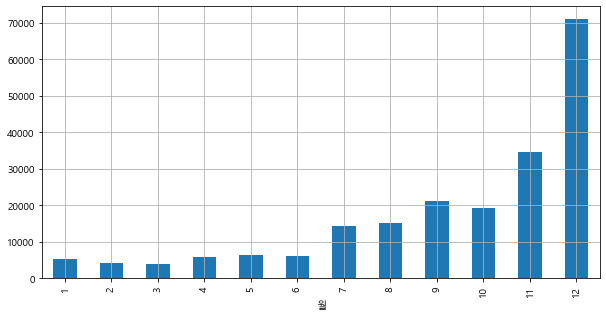

In [201]:
# 서울 전체 월 별 확진자 수 그래프

month_2021['합'].plot(kind="bar", figsize=(10,5), grid=True)

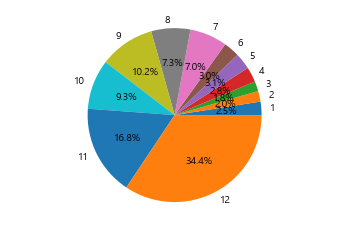

In [205]:
# 원 그래프

plt.axis('equal')
plt.pie(month_2021['합'], labels=month_2021.index, autopct="%1.1f%%")
plt.show()

#### 2. 강서구 월 별 총 확진자

<AxesSubplot:xlabel='월'>

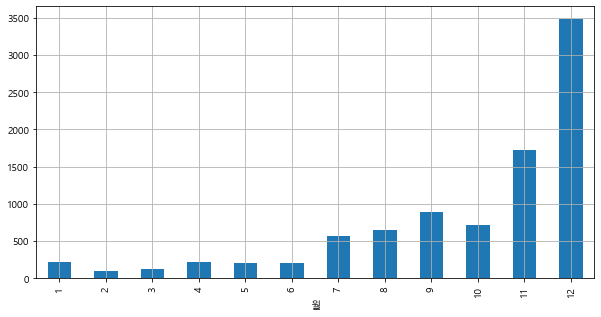

In [177]:
# 2021년 강서구 총 확진자

month_2021["강서구"].plot(kind="bar", figsize=(10,5), grid=True)